In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
file_path = "Superstore.csv"  
superstore_data = pd.read_csv(file_path, encoding="ISO-8859-1")
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
superstore_data['Sales_ZScore'] = stats.zscore(superstore_data['Sales'])
print(superstore_data['Sales_ZScore'])

0       0.051510
1       0.805633
2      -0.345368
3       1.167688
4      -0.332935
          ...   
9989   -0.328314
9990   -0.221269
9991    0.046080
9992   -0.321331
9993    0.021344
Name: Sales_ZScore, Length: 9994, dtype: float64


In [6]:
outliers = superstore_data[superstore_data['Sales_ZScore'].abs() > 3]
print(outliers)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
27        28  US-2012-150630  17-09-2012  21-09-2012  Standard Class   
165      166  CA-2011-139892  08-09-2011  12-09-2011  Standard Class   
251      252  CA-2013-145625  12-09-2013  18-09-2013  Standard Class   
262      263  US-2011-106992  19-09-2011  21-09-2011    Second Class   
263      264  US-2011-106992  19-09-2011  21-09-2011    Second Class   
...      ...             ...         ...         ...             ...   
9741    9742  CA-2012-117086  08-11-2012  12-11-2012  Standard Class   
9774    9775  CA-2011-169019  26-07-2011  30-07-2011  Standard Class   
9857    9858  CA-2012-164301  26-03-2012  30-03-2012  Standard Class   
9929    9930  CA-2013-129630  05-09-2013  05-09-2013        Same Day   
9948    9949  CA-2014-121559  02-06-2014  04-06-2014    Second Class   

     Customer ID    Customer Name    Segment        Country           City  \
27      TB-21520  Tracy Blumstein   Consumer  United Stat

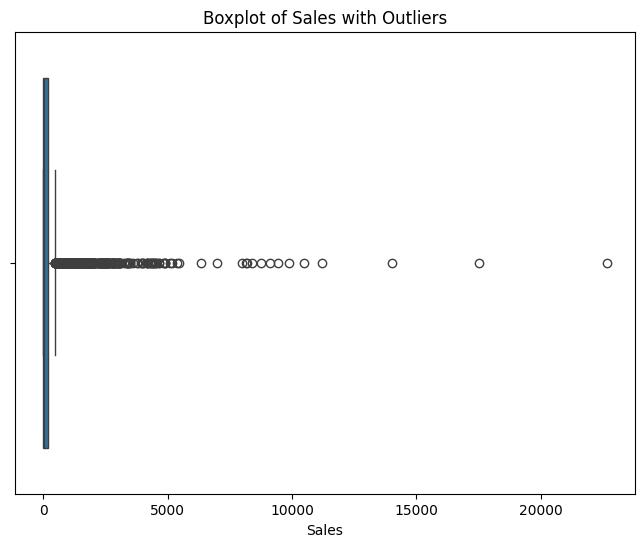

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=superstore_data['Sales'])
plt.title('Boxplot of Sales with Outliers')
plt.xlabel('Sales')
plt.show()

In [9]:
print(outliers[['Sales', 'Sales_ZScore']].head())

        Sales  Sales_ZScore
27   3083.430      4.578800
165  8159.952     12.724514
251  3347.370      5.002314
262  3059.982      4.541176
263  2519.958      3.674661
